In [1]:
import pandas as pd
import numpy as np

In [7]:
df=pd.read_csv("C:/Users/Lenovo/Downloads/BAJFINANCE.csv")
df.head(3)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,BAJAUTOFIN,EQ,46.95,49.45,50.75,46.5,50.75,50.75,50.05,7600,3.803800e+10,NaN,NaN,NaN
1,2000-01-04,BAJAUTOFIN,EQ,50.75,53.20,53.20,47.9,48.00,48.10,48.56,5000,2.428000e+10,NaN,NaN,NaN
2,2000-01-05,BAJAUTOFIN,EQ,48.10,46.55,47.40,44.6,44.60,44.60,45.47,3500,1.591450e+10,NaN,NaN,NaN


In [9]:
df.set_index("Date",inplace=True)

In [11]:
#Plotting target variable VWAP Over time

<Axes: xlabel='Date'>

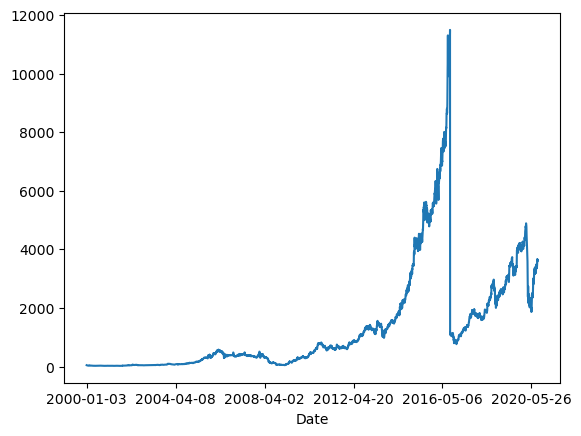

In [15]:
df['VWAP'].plot()

In [17]:
df.shape

(5070, 14)

In [19]:
df.isna().sum()

Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2779
Deliverable Volume     446
%Deliverble            446
dtype: int64

In [21]:
df.dropna(inplace=True)

In [23]:
df.head(3)

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2011-06-01,BAJFINANCE,EQ,616.70,617.00,636.5,616.0,627.0,631.85,627.01,6894,4.322621e+11,1416.0,3427.0,0.4971
2011-06-02,BAJFINANCE,EQ,631.85,625.00,638.9,620.0,634.0,633.45,636.04,2769,1.761205e+11,432.0,1718.0,0.6204
2011-06-03,BAJFINANCE,EQ,633.45,625.15,637.8,620.0,623.0,625.00,625.09,51427,3.214631e+12,135.0,50912.0,0.9900


In [25]:
#all nan values have been replaced

In [27]:
df.isna().sum()

Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

In [31]:
df.shape

(2291, 14)

In [33]:
data=df.copy()

In [37]:
data.dtypes

Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Trades                float64
Deliverable Volume    float64
%Deliverble           float64
dtype: object

In [39]:
data.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [43]:
data[["Open","High","Low","Close"]].corr()

,Open,High,Low,Close
Open,1.000000,0.999575,0.999602,0.999285
High,0.999575,1.000000,0.999358,0.999695
Low,0.999602,0.999358,1.000000,0.999616
Close,0.999285,0.999695,0.999616,1.000000


In [53]:
lag_features=["High","Low","Trades","Turnover","Volume"]
window1=3
window2=7

In [49]:
#the above step was of feature engineering step including the lagged feature

In [55]:
for feature in lag_features:
    data[feature+"rolling_mean_3"]=data[feature].rolling(window=window1).mean()
    data[feature+"rolling_mean_7"]=data[feature].rolling(window=window2).mean()

In [59]:
for feature in lag_features:
    data[feature+"rolling_std_3"]=data[feature].rolling(window=window1).std()
    data[feature+"rolling_std_7"]=data[feature].rolling(window=window2).std()

In [61]:
data.head(5)

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,Highrolling_std_3,Highrolling_std_7,Lowrolling_std_3,Lowrolling_std_7,Tradesrolling_std_3,Tradesrolling_std_7,Turnoverrolling_std_3,Turnoverrolling_std_7,Volumerolling_std_3,Volumerolling_std_7
Date,,,,,,,,,,,,,,,,,,,,,
2011-06-01,BAJFINANCE,EQ,616.70,617.00,636.50,616.00,627.00,631.85,627.01,6894,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-02,BAJFINANCE,EQ,631.85,625.00,638.90,620.00,634.00,633.45,636.04,2769,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-03,BAJFINANCE,EQ,633.45,625.15,637.80,620.00,623.00,625.00,625.09,51427,...,1.201388,NaN,2.309401,NaN,670.500559,NaN,1.685217e+12,NaN,26980.871860,NaN
2011-06-06,BAJFINANCE,EQ,625.00,620.00,641.00,611.35,611.35,614.00,616.03,5446,...,1.625833,NaN,4.994080,NaN,148.769396,NaN,1.710136e+12,NaN,27352.695339,NaN
2011-06-07,BAJFINANCE,EQ,614.00,604.00,623.95,604.00,619.90,619.15,617.73,5991,...,9.062422,NaN,8.008797,NaN,78.270897,NaN,1.652377e+12,NaN,26391.221653,NaN


In [63]:
data.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'Highrolling_mean_3', 'Highrolling_mean_7',
       'Lowrolling_mean_3', 'Lowrolling_mean_7', 'Tradesrolling_mean_3',
       'Tradesrolling_mean_7', 'Turnoverrolling_mean_3',
       'Turnoverrolling_mean_7', 'Volumerolling_mean_3',
       'Volumerolling_mean_7', 'Highrolling_std_3', 'Highrolling_std_7',
       'Lowrolling_std_3', 'Lowrolling_std_7', 'Tradesrolling_std_3',
       'Tradesrolling_std_7', 'Turnoverrolling_std_3', 'Turnoverrolling_std_7',
       'Volumerolling_std_3', 'Volumerolling_std_7'],
      dtype='object')

In [65]:
data.shape

(2291, 34)

In [67]:
data.isna().sum()


Symbol                    0
Series                    0
Prev Close                0
Open                      0
High                      0
Low                       0
Last                      0
Close                     0
VWAP                      0
Volume                    0
Turnover                  0
Trades                    0
Deliverable Volume        0
%Deliverble               0
Highrolling_mean_3        2
Highrolling_mean_7        6
Lowrolling_mean_3         2
Lowrolling_mean_7         6
Tradesrolling_mean_3      2
Tradesrolling_mean_7      6
Turnoverrolling_mean_3    2
Turnoverrolling_mean_7    6
Volumerolling_mean_3      2
Volumerolling_mean_7      6
Highrolling_std_3         2
Highrolling_std_7         6
Lowrolling_std_3          2
Lowrolling_std_7          6
Tradesrolling_std_3       2
Tradesrolling_std_7       6
Turnoverrolling_std_3     2
Turnoverrolling_std_7     6
Volumerolling_std_3       2
Volumerolling_std_7       6
dtype: int64

In [69]:
data.dropna(inplace=True)

In [73]:
data.isna().sum()

Symbol                    0
Series                    0
Prev Close                0
Open                      0
High                      0
Low                       0
Last                      0
Close                     0
VWAP                      0
Volume                    0
Turnover                  0
Trades                    0
Deliverable Volume        0
%Deliverble               0
Highrolling_mean_3        0
Highrolling_mean_7        0
Lowrolling_mean_3         0
Lowrolling_mean_7         0
Tradesrolling_mean_3      0
Tradesrolling_mean_7      0
Turnoverrolling_mean_3    0
Turnoverrolling_mean_7    0
Volumerolling_mean_3      0
Volumerolling_mean_7      0
Highrolling_std_3         0
Highrolling_std_7         0
Lowrolling_std_3          0
Lowrolling_std_7          0
Tradesrolling_std_3       0
Tradesrolling_std_7       0
Turnoverrolling_std_3     0
Turnoverrolling_std_7     0
Volumerolling_std_3       0
Volumerolling_std_7       0
dtype: int64

In [75]:
data.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'Highrolling_mean_3', 'Highrolling_mean_7',
       'Lowrolling_mean_3', 'Lowrolling_mean_7', 'Tradesrolling_mean_3',
       'Tradesrolling_mean_7', 'Turnoverrolling_mean_3',
       'Turnoverrolling_mean_7', 'Volumerolling_mean_3',
       'Volumerolling_mean_7', 'Highrolling_std_3', 'Highrolling_std_7',
       'Lowrolling_std_3', 'Lowrolling_std_7', 'Tradesrolling_std_3',
       'Tradesrolling_std_7', 'Turnoverrolling_std_3', 'Turnoverrolling_std_7',
       'Volumerolling_std_3', 'Volumerolling_std_7'],
      dtype='object')

In [77]:
ind_features=['Highrolling_mean_3', 'Highrolling_mean_7',
       'Lowrolling_mean_3', 'Lowrolling_mean_7', 'Tradesrolling_mean_3',
       'Tradesrolling_mean_7', 'Turnoverrolling_mean_3',
       'Turnoverrolling_mean_7', 'Volumerolling_mean_3',
       'Volumerolling_mean_7', 'Highrolling_std_3', 'Highrolling_std_7',
       'Lowrolling_std_3', 'Lowrolling_std_7', 'Tradesrolling_std_3',
       'Tradesrolling_std_7', 'Turnoverrolling_std_3', 'Turnoverrolling_std_7',
       'Volumerolling_std_3', 'Volumerolling_std_7']

In [79]:
data.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'Highrolling_mean_3', 'Highrolling_mean_7',
       'Lowrolling_mean_3', 'Lowrolling_mean_7', 'Tradesrolling_mean_3',
       'Tradesrolling_mean_7', 'Turnoverrolling_mean_3',
       'Turnoverrolling_mean_7', 'Volumerolling_mean_3',
       'Volumerolling_mean_7', 'Highrolling_std_3', 'Highrolling_std_7',
       'Lowrolling_std_3', 'Lowrolling_std_7', 'Tradesrolling_std_3',
       'Tradesrolling_std_7', 'Turnoverrolling_std_3', 'Turnoverrolling_std_7',
       'Volumerolling_std_3', 'Volumerolling_std_7'],
      dtype='object')

In [81]:
data.shape

(2285, 34)

In [83]:
train_data=data[0:1800]
test_data=data[1800:]

In [85]:
train_data

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,Highrolling_std_3,Highrolling_std_7,Lowrolling_std_3,Lowrolling_std_7,Tradesrolling_std_3,Tradesrolling_std_7,Turnoverrolling_std_3,Turnoverrolling_std_7,Volumerolling_std_3,Volumerolling_std_7
Date,,,,,,,,,,,,,,,,,,,,,
2011-06-09,BAJFINANCE,EQ,635.60,639.80,647.00,630.00,630.00,631.10,638.27,31252,...,12.769789,7.494911,15.011107,9.410145,354.841279,463.942320,8.665128e+11,1.155773e+12,13497.047986,18373.894011
2011-06-10,BAJFINANCE,EQ,631.10,641.85,648.25,618.55,621.10,622.20,634.16,30885,...,1.639360,8.227994,13.030765,9.501961,272.875429,448.020620,1.579562e+11,1.136003e+12,2434.970705,18047.331029
2011-06-13,BAJFINANCE,EQ,622.20,616.00,627.85,616.00,622.75,624.95,622.92,3981,...,11.434196,9.497080,7.456597,9.298317,557.373603,464.778596,9.982094e+11,1.123423e+12,15640.051929,17835.642665
2011-06-14,BAJFINANCE,EQ,624.95,625.00,628.95,619.95,621.20,622.10,625.35,5597,...,11.473593,10.198891,2.002707,9.293713,656.385050,455.234163,9.595224e+11,8.397765e+11,15088.183102,13139.472184
2011-06-15,BAJFINANCE,EQ,622.10,612.00,623.00,598.10,605.00,601.70,606.90,12590,...,3.165833,11.352292,11.643560,11.262712,150.639747,436.941971,2.733211e+11,7.983186e+11,4575.812970,12469.137006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-09-04,BAJFINANCE,EQ,2724.05,2724.00,2777.65,2683.50,2748.00,2746.30,2726.23,2606992,...,88.954937,79.489416,83.341306,107.041856,2794.744413,21708.856675,1.827289e+14,1.673270e+14,696998.737787,642979.884199
2018-09-05,BAJFINANCE,EQ,2746.30,2740.15,2764.80,2668.00,2704.45,2716.90,2712.53,1728455,...,63.129081,100.594924,24.113551,119.854378,21770.352164,17267.163548,1.375623e+14,1.467744e+14,483305.554092,570427.041296
2018-09-06,BAJFINANCE,EQ,2716.90,2729.00,2731.50,2671.40,2672.20,2684.10,2695.89,1147879,...,23.818183,113.135709,8.146779,118.187686,30923.312263,24013.596897,2.020435e+14,1.561692e+14,734609.476628,584307.816124


In [89]:
!pip install pmdarima

   ---------------------------------------- 0.0/625.1 kB ? eta -:--:--
   - ------------------------------------- 20.5/625.1 kB 330.3 kB/s eta 0:00:02
   - ------------------------------------- 30.7/625.1 kB 330.3 kB/s eta 0:00:02
   ----- --------------------------------- 81.9/625.1 kB 573.4 kB/s eta 0:00:01
   ---------- --------------------------- 174.1/625.1 kB 952.6 kB/s eta 0:00:01
   ---------------- ----------------------- 256.0/625.1 kB 1.1 MB/s eta 0:00:01
   ---------------------- ----------------- 358.4/625.1 kB 1.3 MB/s eta 0:00:01
   -------------------------- ------------- 409.6/625.1 kB 1.3 MB/s eta 0:00:01
   ----------------------------------- ---- 553.0/625.1 kB 1.5 MB/s eta 0:00:01
   ---------------------------------------  624.6/625.1 kB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 625.1/625.1 kB 1.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   - -------------------------------------- 0.1/2.8 MB 2.6 M

In [97]:
import pmdarima
pmdarima.__version__

'2.0.4'

In [100]:
import warnings
warnings.filterwarnings('ignore')